# IPDxIRR_2F (Ionospheric plasma densities)

> Abstract: Access to the derived plasma characteristics at 1Hz (level 2 product).

In [1]:
# ———————— パッケージのインストール ————————
# watermark と viresclient が入っていなければインストール
# （実行環境によっては先頭に ! が必要です）
%pip install --upgrade watermark viresclient

# matplotlib, pandas, xarray はすでに入っている前提ですが、
# ときどきバージョンが古いとエラーになることがあるので
%pip install --upgrade pandas xarray matplotlib

# ———————— IPython拡張のロード ————————
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.4/100.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 51.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully unins

In [2]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.11.12
IPython version      : 7.34.0

viresclient: 0.13.0
pandas     : 2.2.3
xarray     : 2025.4.0
matplotlib : 3.10.3



In [3]:
from viresclient import SwarmRequest
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

request = SwarmRequest(url="https://vires.services/ows",
    token="HJGKv5qxi2hATDMcd2D13-uhFJznQPUc")  #API_token by doku.kuma7

## IPDxIRR_2F product information

Derived plasma characteristics at 1Hz, for each Swarm spacecraft.

Documentation:
- https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/level-2-product-definitions#IPDxIRR_2F

### Check what "IPD" data variables are available

In [4]:
request.available_collections("IPD", details=False)

{'IPD': ['SW_OPER_IPDAIRR_2F', 'SW_OPER_IPDBIRR_2F', 'SW_OPER_IPDCIRR_2F']}

In [5]:
request.available_measurements("IPD")

['Ne',
 'Te',
 'Background_Ne',
 'Foreground_Ne',
 'PCP_flag',
 'Grad_Ne_at_100km',
 'Grad_Ne_at_50km',
 'Grad_Ne_at_20km',
 'Grad_Ne_at_PCP_edge',
 'ROD',
 'RODI10s',
 'RODI20s',
 'delta_Ne10s',
 'delta_Ne20s',
 'delta_Ne40s',
 'Num_GPS_satellites',
 'mVTEC',
 'mROT',
 'mROTI10s',
 'mROTI20s',
 'IBI_flag',
 'Ionosphere_region_flag',
 'IPIR_index',
 'Ne_quality_flag',
 'TEC_STD']

## Fetch three hours of IPD data

In [6]:
request.set_collection("SW_OPER_IPDAIRR_2F")
request.set_products(measurements=request.available_measurements("IPD"))
data = request.get_between(
    dt.datetime(2023,4,24,11),
    dt.datetime(2023,4,24,12,30)
)

Processing:  100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ] [1/1] 
Downloading: 100%|██████████|  [ Elapsed: 00:06, Remaining: 00:00 ] (1.147MB)


### Load and plot using pandas/matplotlib

In [7]:
df = data.as_dataframe()
df.head()

,Grad_Ne_at_PCP_edge,Ne,Grad_Ne_at_50km,ROD,mROT,Foreground_Ne,RODI20s,Grad_Ne_at_100km,mROTI10s,delta_Ne40s,...,Ionosphere_region_flag,mROTI20s,Background_Ne,Grad_Ne_at_20km,delta_Ne20s,Latitude,IBI_flag,RODI10s,TEC_STD,mVTEC
Timestamp,,,,,,,,,,,,,,,,,,,,,
2023-04-24 11:00:00.197007895,0.0,144361.0,-0.061898,0.0,0.018277,144576.906250,1655.989237,-0.136098,0.054220,9462.1,...,2,0.084545,128610.796875,-0.084960,5591.05,63.070872,-1,1715.138764,1.920852,8.349881
2023-04-24 11:00:01.197000027,0.0,143299.0,-0.151412,-776.4,0.020262,144556.203125,1654.604567,-0.183346,0.054407,8380.2,...,2,0.107041,128435.500000,-0.148715,4529.05,63.134654,-1,1911.295034,1.884819,8.368158
2023-04-24 11:00:02.197007895,0.0,141766.7,-0.297628,-1159.4,0.020250,143299.000000,1711.515000,-0.195974,0.051266,6618.2,...,2,0.111590,127688.296875,-0.249661,2996.75,63.198435,-1,1911.295034,1.891178,8.388408
2023-04-24 11:00:03.197000027,0.0,139855.6,-0.373123,-2662.8,0.000404,141766.703125,1826.529494,-0.261335,0.046710,4632.8,...,2,0.114950,127594.601562,-0.378539,1085.65,63.262215,-1,1911.295034,1.890389,8.417990
2023-04-24 11:00:04.197007895,0.0,135729.6,-0.373246,-5127.2,-0.062128,139855.593750,1752.493366,-0.318243,0.053518,382.5,...,2,0.117876,127521.703125,-0.682013,1292.35,63.325992,-1,1911.295034,1.821930,8.431907


In [8]:
df.columns

Index(['Grad_Ne_at_PCP_edge', 'Ne', 'Grad_Ne_at_50km', 'ROD', 'mROT',
       'Foreground_Ne', 'RODI20s', 'Grad_Ne_at_100km', 'mROTI10s',
       'delta_Ne40s', 'Ne_quality_flag', 'Num_GPS_satellites', 'Te',
       'IPIR_index', 'Radius', 'Longitude', 'PCP_flag', 'Spacecraft',
       'delta_Ne10s', 'Ionosphere_region_flag', 'mROTI20s', 'Background_Ne',
       'Grad_Ne_at_20km', 'delta_Ne20s', 'Latitude', 'IBI_flag', 'RODI10s',
       'TEC_STD', 'mVTEC'],
      dtype='object')

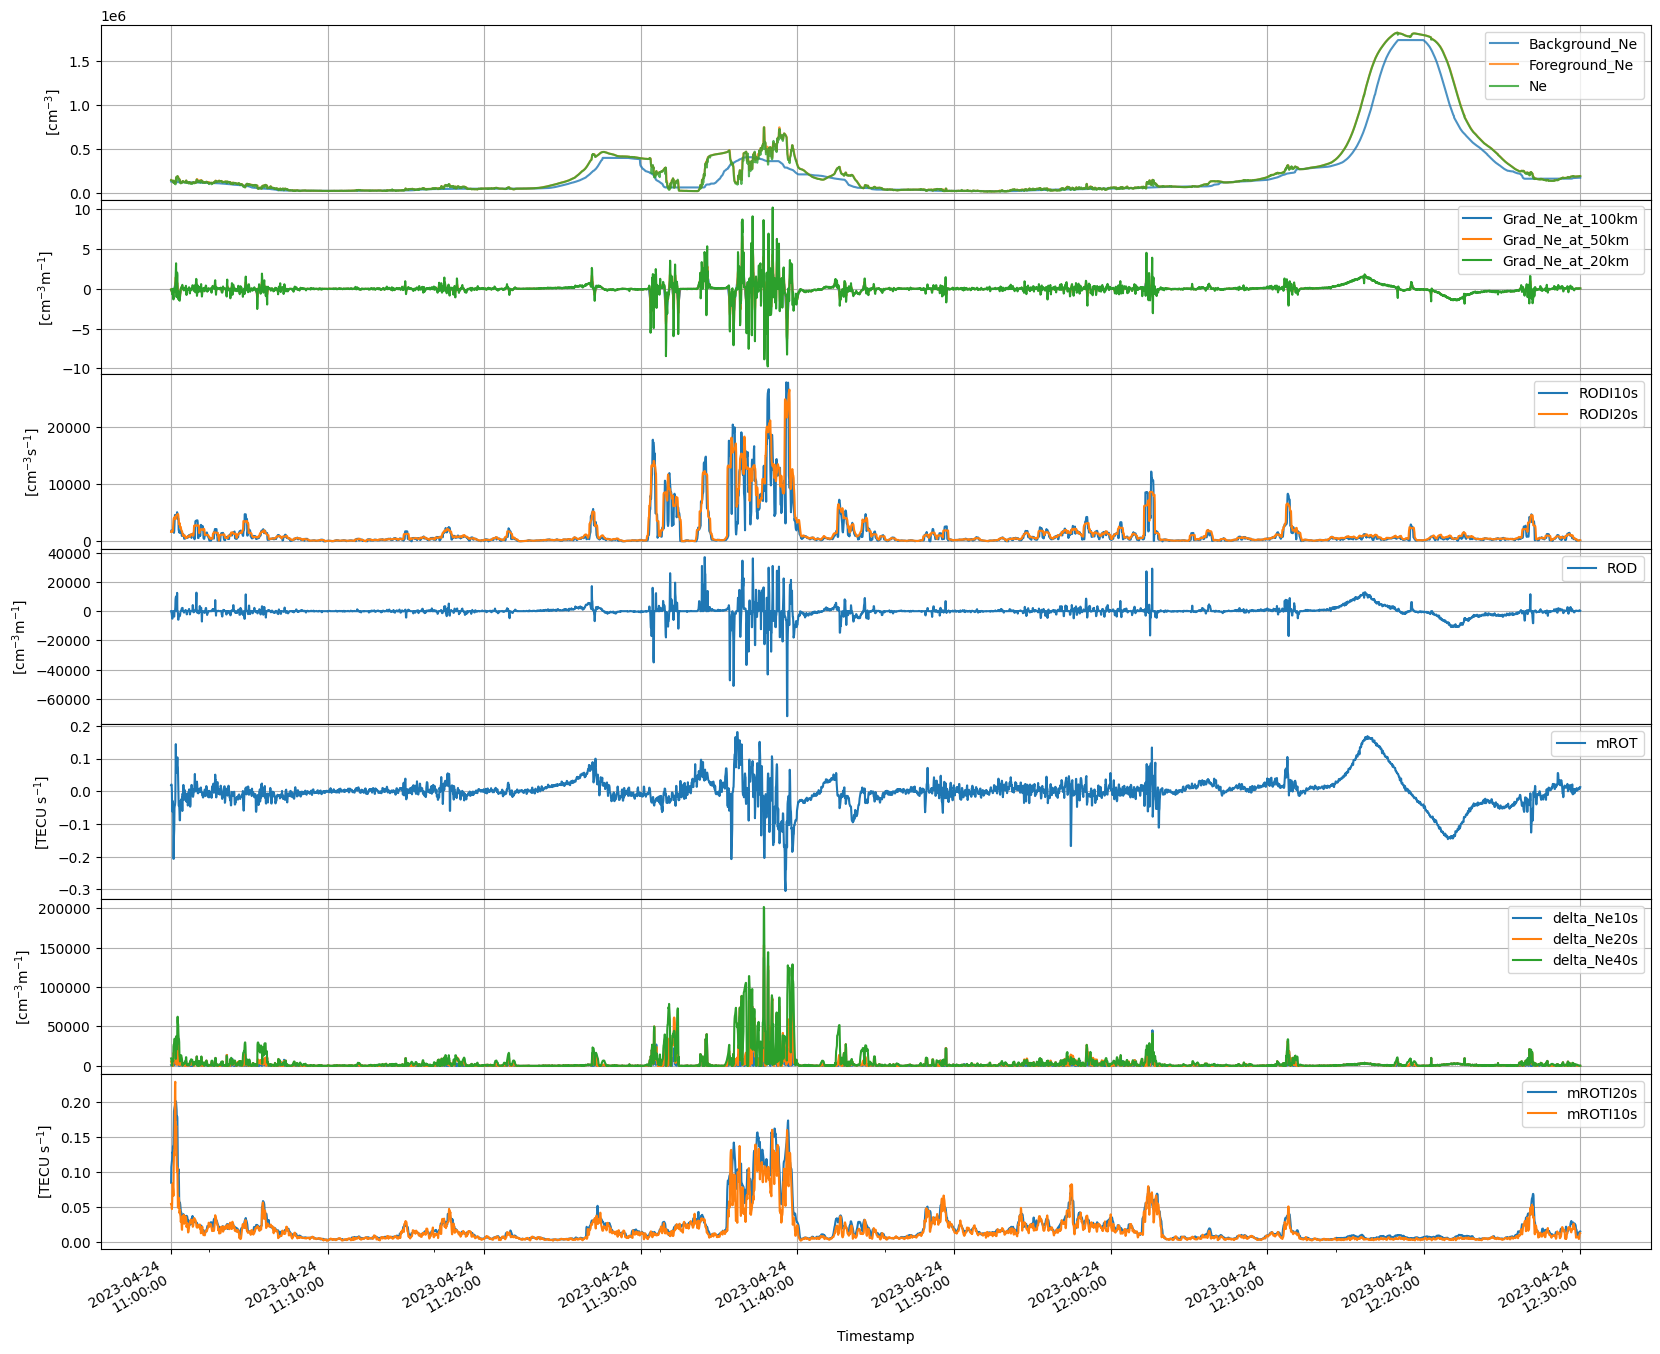

In [9]:
#satellite A
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(20,18), sharex=True)
df.plot(ax=axes[0], y=['Background_Ne', 'Foreground_Ne', 'Ne'], alpha=0.8)
df.plot(ax=axes[1], y=['Grad_Ne_at_100km', 'Grad_Ne_at_50km', 'Grad_Ne_at_20km'])
df.plot(ax=axes[2], y=['RODI10s', 'RODI20s'])
df.plot(ax=axes[3], y=['ROD'])
df.plot(ax=axes[4], y=['mROT'])
df.plot(ax=axes[5], y=['delta_Ne10s', 'delta_Ne20s', 'delta_Ne40s'])
df.plot(ax=axes[6], y=['mROTI20s', 'mROTI10s'])
axes[0].set_ylabel("[cm$^{-3}$]")
axes[1].set_ylabel("[cm$^{-3}$m$^{-1}$]")
axes[2].set_ylabel("[cm$^{-3}$s$^{-1}$]")
axes[3].set_ylabel("[cm$^{-3}$m$^{-1}$]")
axes[4].set_ylabel("[TECU s$^{-1}$]")
axes[5].set_ylabel("[cm$^{-3}$m$^{-1}$]")
axes[6].set_ylabel("[TECU s$^{-1}$]")
axes[6].set_xlabel("Timestamp")

for ax in axes:
    # Reformat time axis
    # https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/customize-dates--matplotlib-plots-python/
    ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M:%S"))
    ax.legend(loc="upper right")
    ax.grid()
fig.subplots_adjust(hspace=0)

### Load as xarray

In [10]:
ds = data.as_xarray()
ds

<xarray.Dataset> Size: 1MB
Dimensions:                 (Timestamp: 5400)
Coordinates:
  * Timestamp               (Timestamp) datetime64[ns] 43kB 2023-04-24T11:00:...
Data variables: (12/29)
    Spacecraft              (Timestamp) category 43kB PandasExtensionArray(ar...
    Grad_Ne_at_PCP_edge     (Timestamp) float64 43kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Ne                      (Timestamp) float64 43kB 1.444e+05 ... 1.894e+05
    Grad_Ne_at_50km         (Timestamp) float64 43kB -0.0619 -0.1514 ... 0.0458
    ROD                     (Timestamp) float64 43kB 0.0 -776.4 ... 408.6 285.6
    mROT                    (Timestamp) float64 43kB 0.01828 0.02026 ... 0.01246
    ...                      ...
    delta_Ne20s             (Timestamp) float64 43kB 5.591e+03 ... 137.9
    Latitude                (Timestamp) float64 43kB 63.07 63.13 ... 48.41 48.48
    IBI_flag                (Timestamp) int32 22kB -1 -1 -1 -1 ... -1 -1 -1 -1
    RODI10s                 (Timestamp) float64 43kB 1.715e+03 ... 159.7
    TEC_STD                 (Timestamp) float64 43kB 1.921 1.885 ... 2.035 2.0
    mVTEC                   (Timestamp) float64 43kB 8.35 8.368 ... 11.99 11.96
Attributes:
    Sources:         ['SW_OPER_IPDAIRR_2F_20230424T000000_20230424T235959_0302']
    MagneticModels:  []
    AppliedFilters:  []

### Alternative plot setup

To plot the data from xarray, we need a different plotting setup. This does however give us more control over the plot. The units are extracted directly from the xarray object.

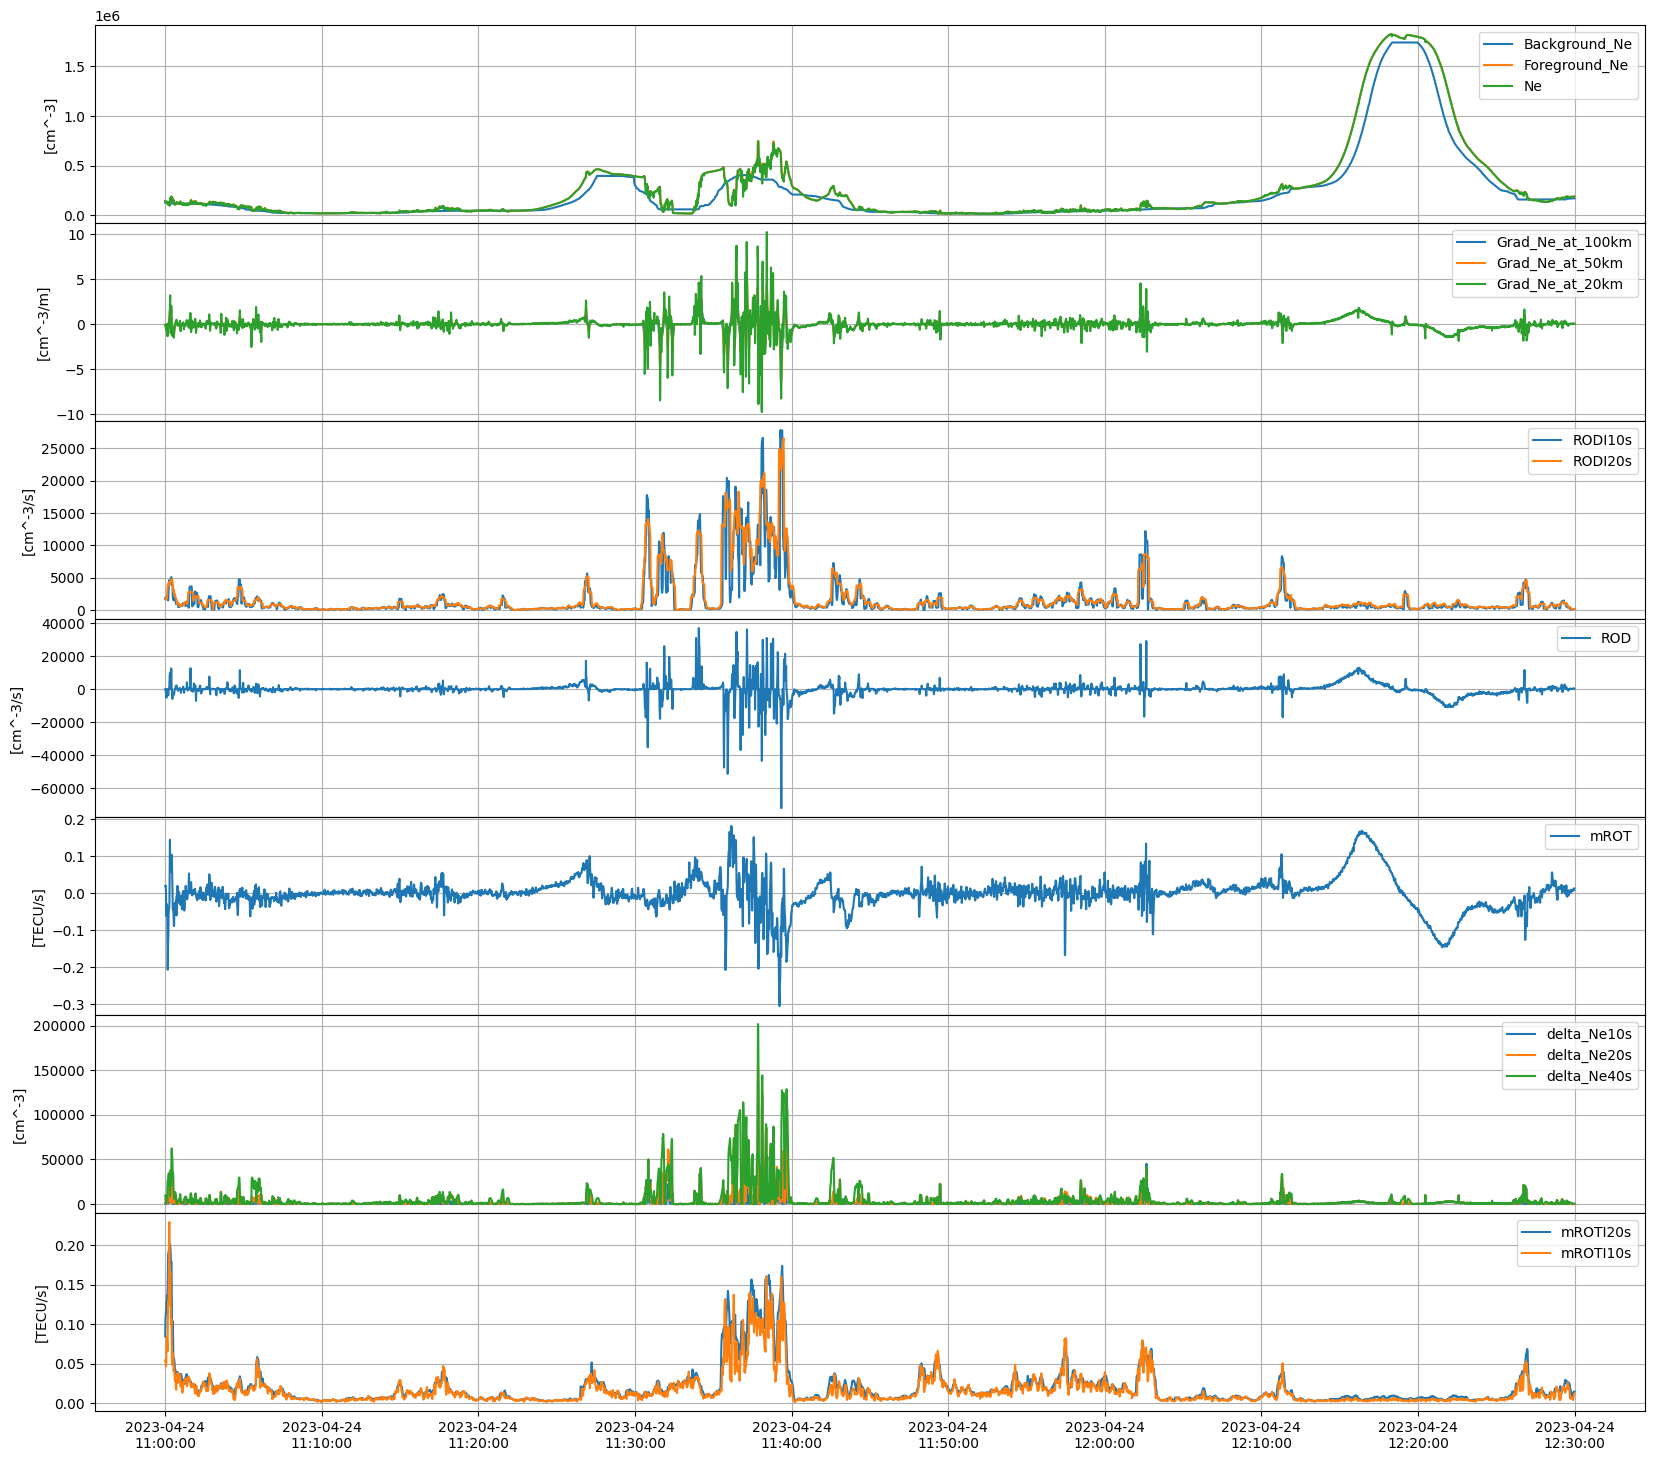

In [11]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(20,18), sharex=True)
def subplot(ax=None, y=None, **kwargs):
    """Plot combination of variables onto a given axis"""
    units = ds[y[0]].units
    for var in y:
        ax.plot(ds["Timestamp"], ds[var], label=var, **kwargs)
        if units != ds[var].units:
            raise ValueError(f"Units mismatch for {var}")
    ax.set_ylabel(f"[{units}]")
    # Reformat time axis
    # https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/customize-dates--matplotlib-plots-python/
    ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M:%S"))
    ax.legend(loc="upper right")
    ax.grid()
subplot(ax=axes[0], y=['Background_Ne', 'Foreground_Ne', 'Ne'])
subplot(ax=axes[1], y=['Grad_Ne_at_100km', 'Grad_Ne_at_50km', 'Grad_Ne_at_20km'])
subplot(ax=axes[2], y=['RODI10s', 'RODI20s'])
subplot(ax=axes[3], y=['ROD'])
subplot(ax=axes[4], y=['mROT'])
subplot(ax=axes[5], y=['delta_Ne10s', 'delta_Ne20s', 'delta_Ne40s'])
subplot(ax=axes[6], y=['mROTI20s', 'mROTI10s'])
fig.subplots_adjust(hspace=0)

Processing:  100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ] [1/1] 
Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.898MB)
Processing:  100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ] [1/1] 
Downloading: 100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ] (0.294MB)
Processing:  100%|██████████|  [ Elapsed: 00:02, Remaining: 00:00 ] [1/1] 
Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.898MB)


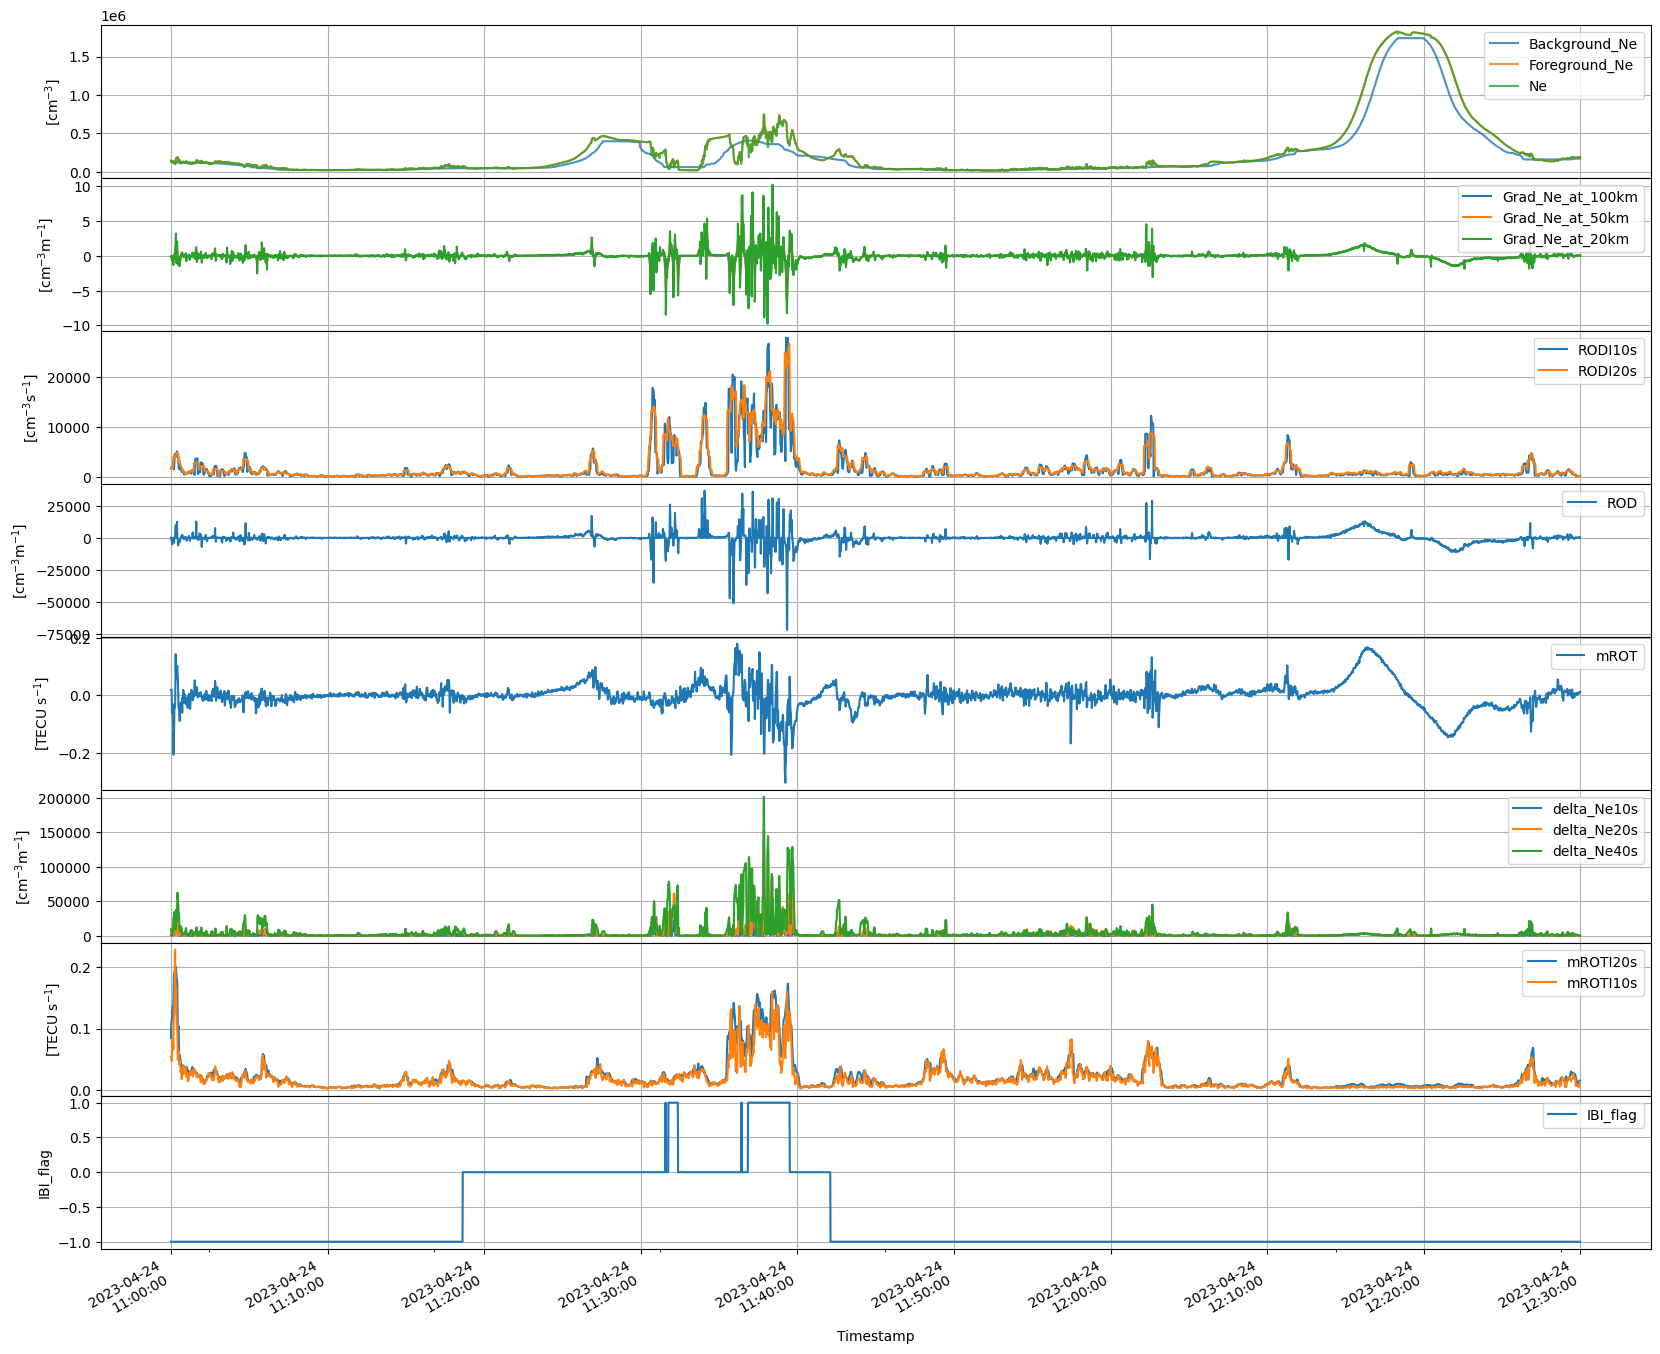

In [12]:
#satellite同士の比較
request.set_collection("SW_OPER_IPDAIRR_2F")
request.set_products(measurements=request.available_measurements("IPD"))
dataA = request.get_between(
    dt.datetime(2023,4,24, 11),
    dt.datetime(2023,4,24, 12,10)    #12:10へ変更
)
dfA = dataA.as_dataframe()

request.set_collection("SW_OPER_IPDBIRR_2F")
request.set_products(measurements=request.available_measurements("IPD"))
dataB = request.get_between(
    dt.datetime(2023,4,24, 4,25),
    dt.datetime(2023,4,24, 4,45)
)
dfB = dataB.as_dataframe()

request.set_collection("SW_OPER_IPDCIRR_2F")
request.set_products(measurements=request.available_measurements("IPD"))
dataC = request.get_between(
    dt.datetime(2023,4,24, 11),
    dt.datetime(2023,4,24, 12,10)      #12:10へ変更
)
dfC = dataC.as_dataframe()
"""
Index(['mROTI20s', 'Num_GPS_satellites', 'Grad_Ne_at_20km', 'RODI10s',
       'RODI20s', 'delta_Ne20s', 'Grad_Ne_at_PCP_edge', 'Ne_quality_flag',
       'PCP_flag', 'mVTEC', 'Te', 'Ionosphere_region_flag', 'delta_Ne10s',
       'Longitude', 'delta_Ne40s', 'IBI_flag', 'ROD', 'Grad_Ne_at_50km',
       'IPIR_index', 'Latitude', 'mROT', 'Radius', 'Grad_Ne_at_100km',
       'mROTI10s', 'Spacecraft', 'Background_Ne', 'Ne', 'TEC_STD',
       'Foreground_Ne'],
      dtype='object')
"""
#以下は分析の例です
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(20,18), sharex=True)
df.plot(ax=axes[0], y=['Background_Ne', 'Foreground_Ne', 'Ne'], alpha=0.8)
df.plot(ax=axes[1], y=['Grad_Ne_at_100km', 'Grad_Ne_at_50km', 'Grad_Ne_at_20km'])
df.plot(ax=axes[2], y=['RODI10s', 'RODI20s'])
df.plot(ax=axes[3], y=['ROD'])
df.plot(ax=axes[4], y=['mROT'])
df.plot(ax=axes[5], y=['delta_Ne10s', 'delta_Ne20s', 'delta_Ne40s'])
df.plot(ax=axes[6], y=['mROTI20s', 'mROTI10s'])
df.plot(ax=axes[7], y=['IBI_flag'])
axes[0].set_ylabel("[cm$^{-3}$]")
axes[1].set_ylabel("[cm$^{-3}$m$^{-1}$]")
axes[2].set_ylabel("[cm$^{-3}$s$^{-1}$]")
axes[3].set_ylabel("[cm$^{-3}$m$^{-1}$]")
axes[4].set_ylabel("[TECU s$^{-1}$]")
axes[5].set_ylabel("[cm$^{-3}$m$^{-1}$]")
axes[6].set_ylabel("[TECU s$^{-1}$]")
axes[6].set_xlabel("Timestamp")
axes[7].set_ylabel("IBI_flag")

for ax in axes:
    # Reformat time axis
    # https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/customize-dates--matplotlib-plots-python/
    ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M:%S"))
    ax.legend(loc="upper right")
    ax.grid()
fig.subplots_adjust(hspace=0)

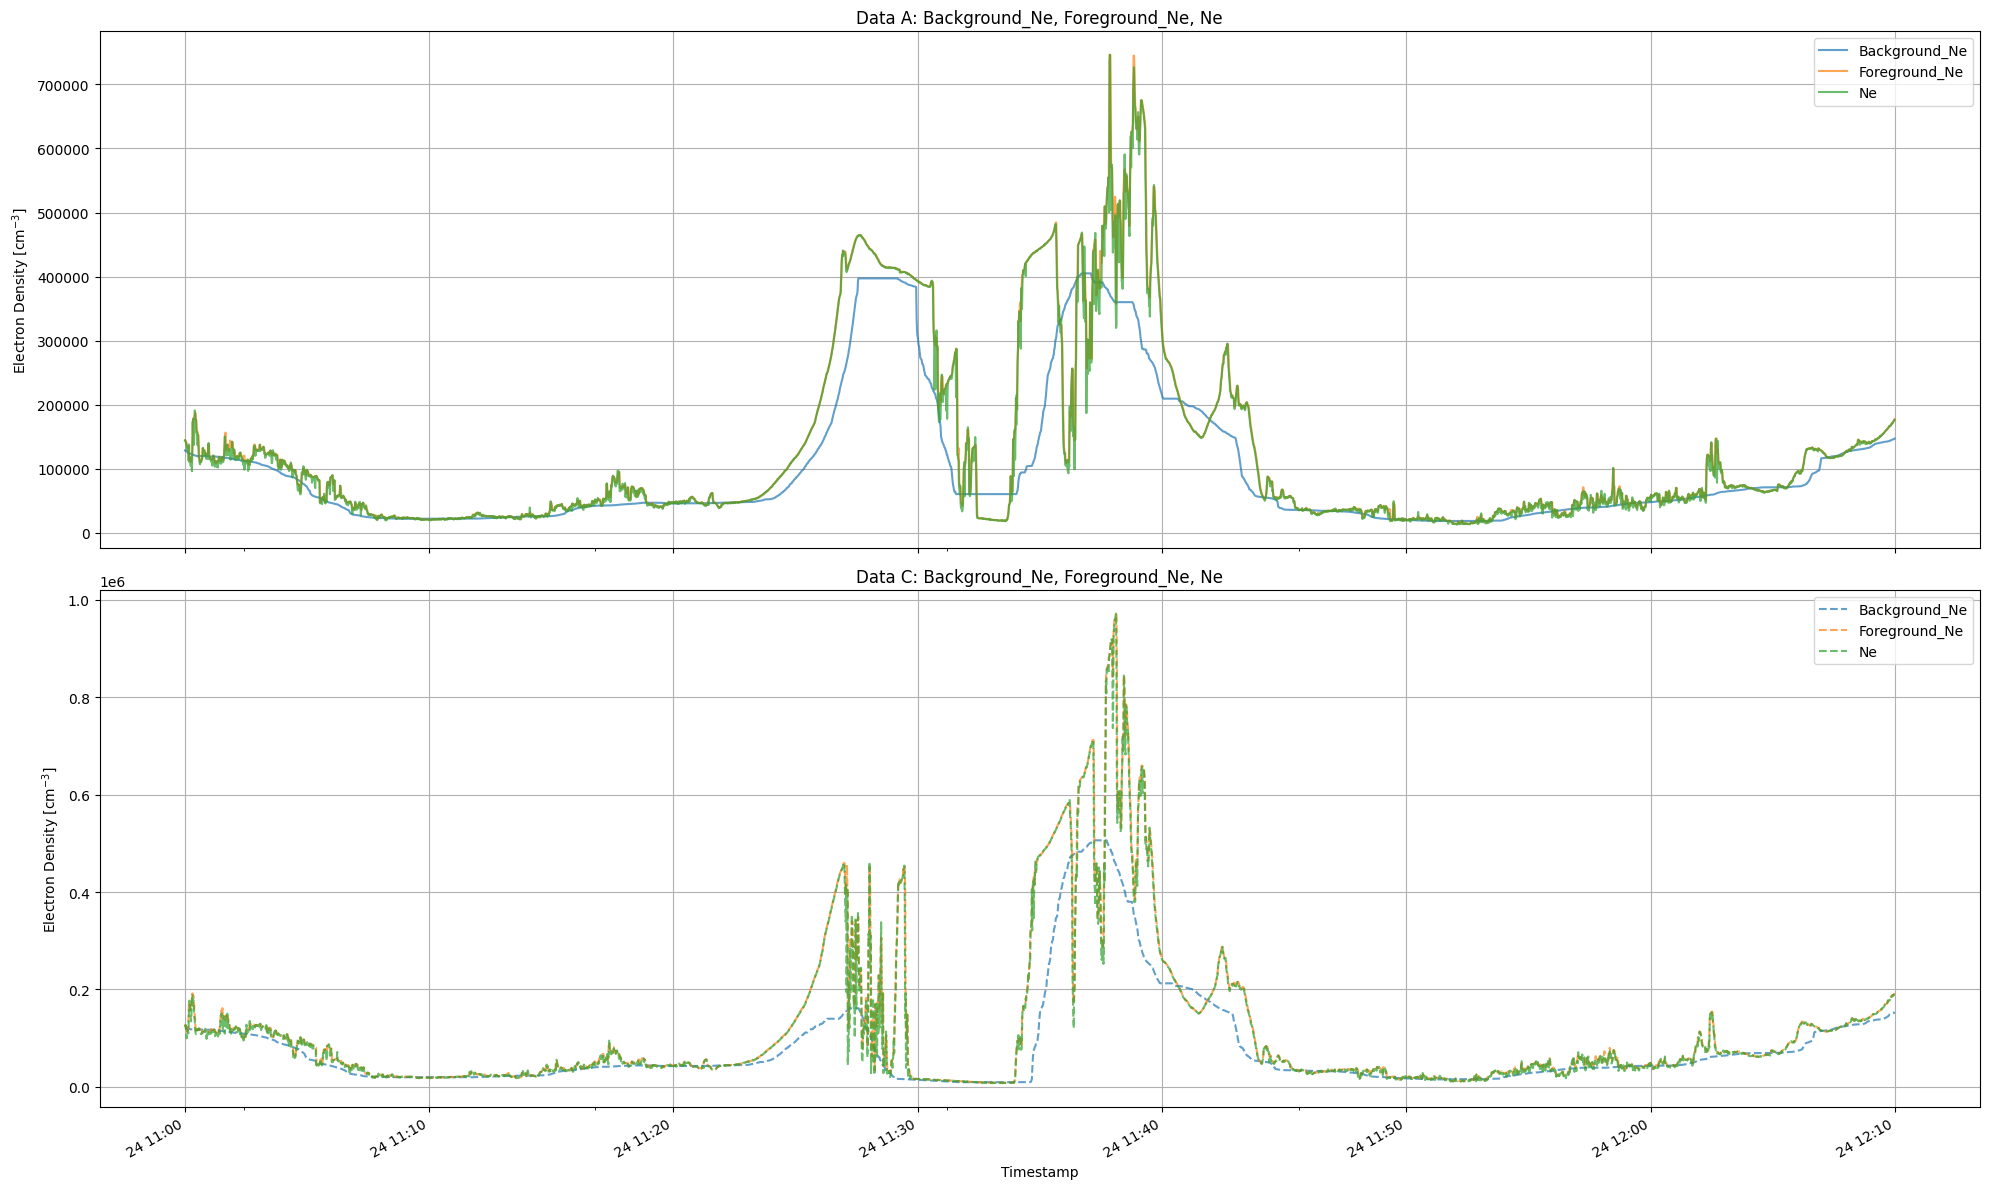

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 12), sharex=True)

# dfAのNe関連データをプロット
dfA.plot(ax=axes[0], y=['Background_Ne', 'Foreground_Ne', 'Ne'], style=['-', '-', '-'], alpha=0.7)
axes[0].set_ylabel("Electron Density [cm$^{-3}$]")
axes[0].set_title("Data A: Background_Ne, Foreground_Ne, Ne")
axes[0].legend(['Background_Ne', 'Foreground_Ne', 'Ne'], loc="upper right")
axes[0].grid()

# dfCのNe関連データをプロット
dfC.plot(ax=axes[1], y=['Background_Ne', 'Foreground_Ne', 'Ne'], style=['--', '--', '--'], alpha=0.7)
axes[1].set_ylabel("Electron Density [cm$^{-3}$]")
axes[1].set_xlabel("Timestamp")
axes[1].set_title("Data C: Background_Ne, Foreground_Ne, Ne")
axes[1].legend(['Background_Ne', 'Foreground_Ne', 'Ne'], loc="upper right")
axes[1].grid()

plt.tight_layout()
plt.show()


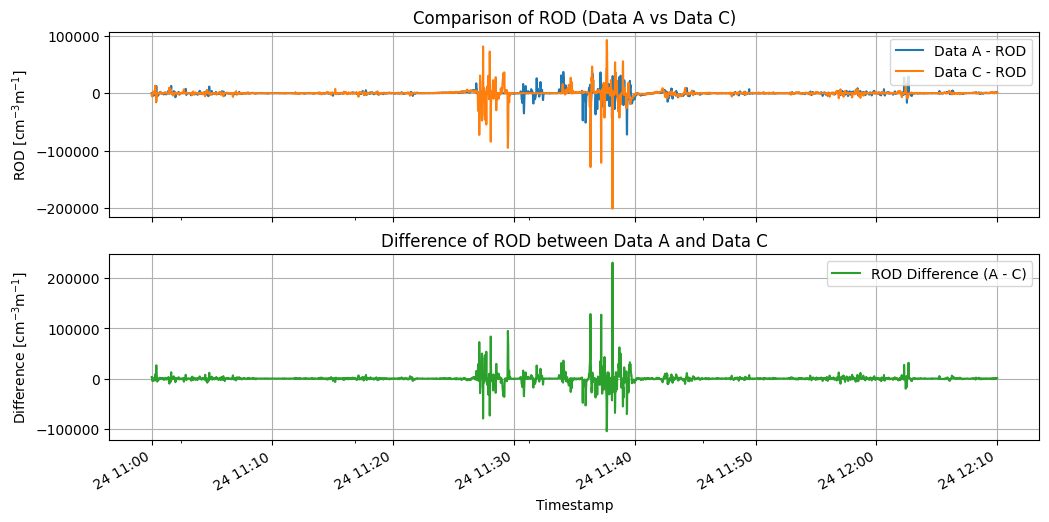

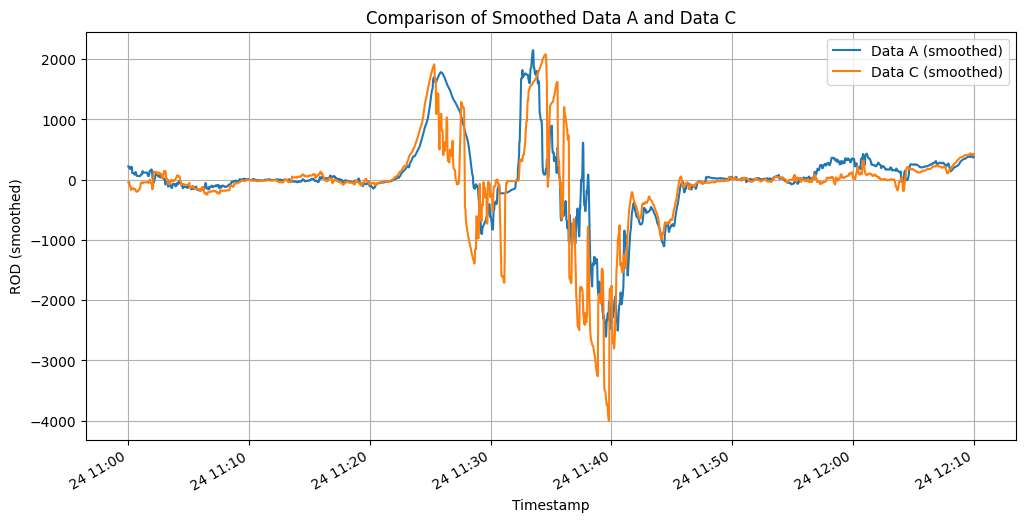

平滑化データの相関係数: 0.7706


In [14]:
#海外PPT用
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6), sharex=True)
#print(dfA.size())  1 data/s

# 上段にdfAとdfCのRODを重ねて表示（比較用）
dfA.plot(ax=axes[0], y='ROD', label='Data A - ROD', color='tab:blue')
dfC.plot(ax=axes[0], y='ROD', label='Data C - ROD', color='tab:orange')
axes[0].set_ylabel("ROD [cm$^{-3}$m$^{-1}$]")
axes[0].legend(loc="upper right")
axes[0].grid()
axes[0].set_title("Comparison of ROD (Data A vs Data C)")

# 下段にdfAとdfCの差分を表示（RODの差分）
(dfA['ROD'] - dfC['ROD']).plot(ax=axes[1], label='ROD Difference (A - C)', color='tab:green')
axes[1].set_ylabel("Difference [cm$^{-3}$m$^{-1}$]")
axes[1].set_xlabel("Timestamp")
axes[1].legend(loc="upper right")
axes[1].grid()
axes[1].set_title("Difference of ROD between Data A and Data C")

fig.subplots_adjust(hspace=0.2)
plt.show()
"""
corr = dfA['ROD'].corr(dfC['ROD'])
print(f'相関係数: {corr:.2f}')

plt.figure(figsize=(8, 6))
plt.scatter(dfA['ROD'], dfC['ROD'], alpha=0.5)
plt.xlabel('Data A (ROD)')
plt.ylabel('Data C (ROD)')
plt.title('Scatter Plot of Data A vs Data C')
plt.grid(True)
plt.show()

dfA['ROD'].rolling(window=10).mean().plot(label='Data A MA')
dfC['ROD'].rolling(window=10).mean().plot(label='Data C MA')
plt.legend()
plt.title('Moving Average Comparison')
plt.grid(True)
plt.show()
"""
from statsmodels.tsa.stattools import ccf
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

# 移動平均の窓サイズを設定（適切に調整してください）
window_size = 200

# 平滑化したデータを計算
dfA_smooth = dfA['ROD'].rolling(window=window_size, min_periods=1, center=True).mean()
dfC_smooth = dfC['ROD'].rolling(window=window_size, min_periods=1, center=True).mean()

# 平滑化データを比較プロット
plt.figure(figsize=(12, 6))
dfA_smooth.plot(label='Data A (smoothed)')
dfC_smooth.plot(label='Data C (smoothed)')
plt.xlabel('Timestamp')
plt.ylabel('ROD (smoothed)')
plt.title('Comparison of Smoothed Data A and Data C')
plt.legend()
plt.grid()
plt.show()

# データを時系列で揃えて相関係数を計算
df_combined = pd.concat([dfA_smooth, dfC_smooth], axis=1, join='inner').dropna()
df_combined.columns = ['DataA_smooth', 'DataC_smooth']

# 相関係数の算出
correlation = df_combined['DataA_smooth'].corr(df_combined['DataC_smooth'])
print(f"平滑化データの相関係数: {correlation:.4f}")

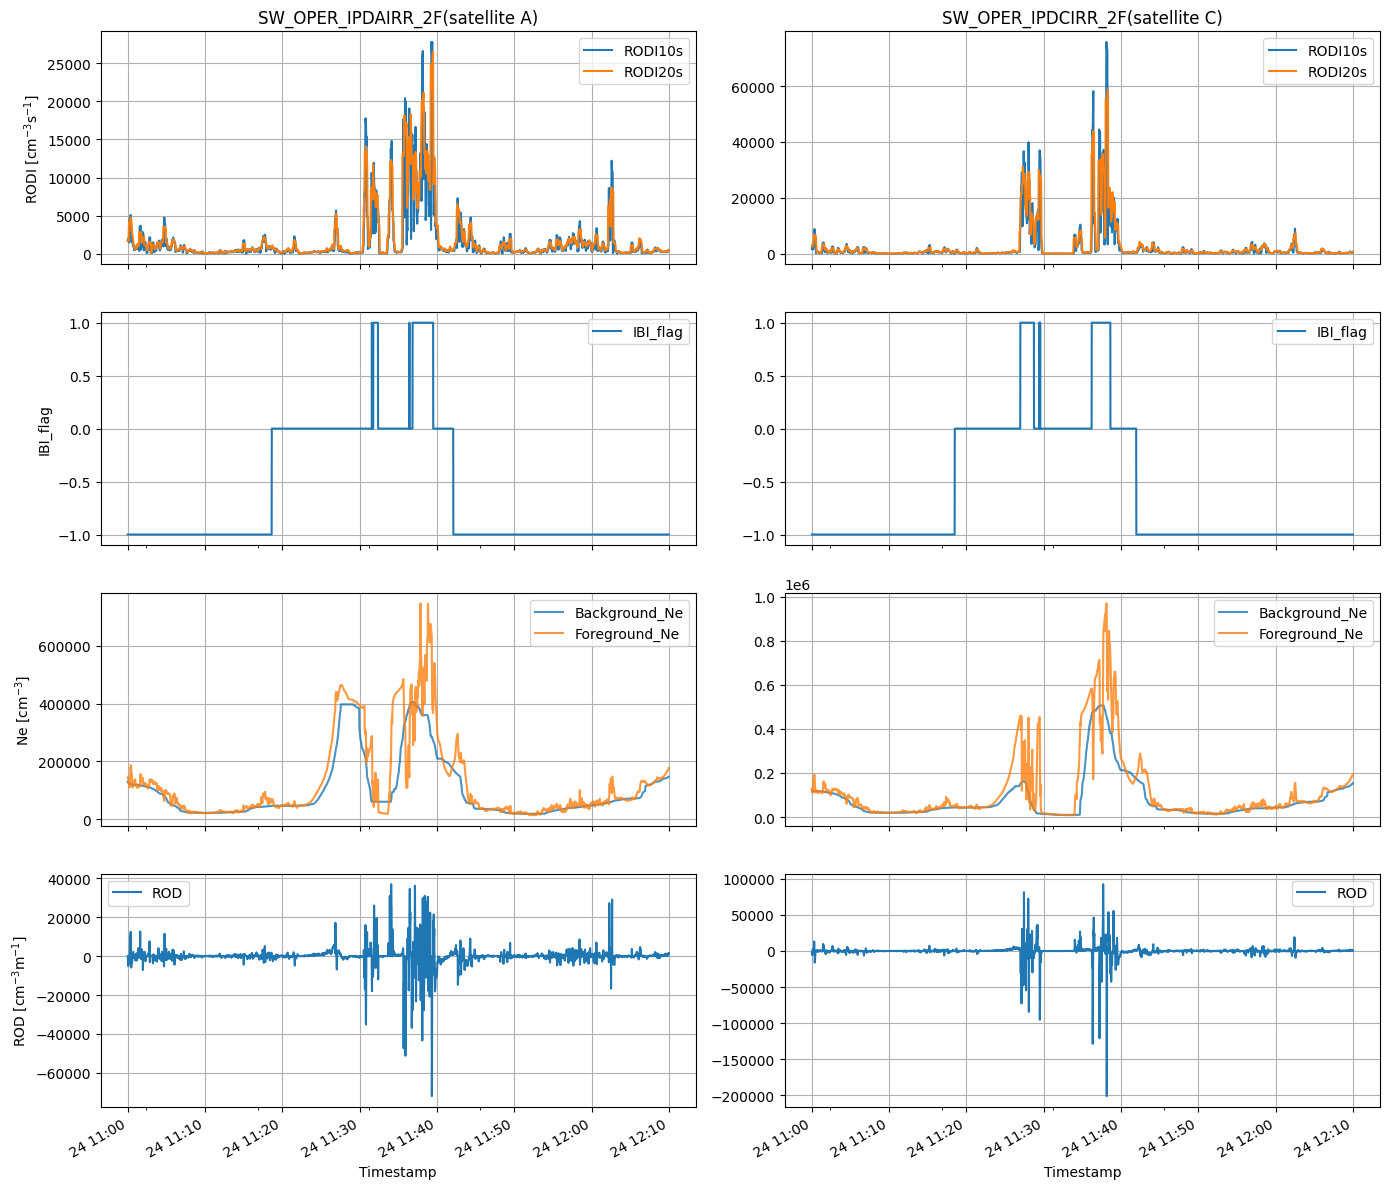

In [20]:
#日本PPT用
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 12), sharex='col')

# data_AのRODI10sとRODI20sのプロット
dfA.plot(ax=axes[0, 0], y=['RODI10s', 'RODI20s'], color=['tab:blue', 'tab:orange'])
axes[0, 0].set_ylabel("RODI [cm$^{-3}$s$^{-1}$]")
axes[0, 0].set_title("SW_OPER_IPDAIRR_2F(satellite A)")
axes[0, 0].grid()

# data_AのIBI_flag
dfA.plot(ax=axes[1, 0], y='IBI_flag', color='tab:blue')
axes[1, 0].set_ylabel("IBI_flag")
#axes[1, 0].set_title("Data A - IBI_flag")
axes[1, 0].grid()

# data_AのBackground_NeとForeground_Ne
dfA.plot(ax=axes[2, 0], y=['Background_Ne', 'Foreground_Ne'], alpha=0.8)
axes[2, 0].set_ylabel("Ne [cm$^{-3}$]")
#axes[2, 0].set_title("Data A - Background & Foreground Ne")
axes[2, 0].grid()

# data_AのROD
dfA.plot(ax=axes[3, 0], y='ROD', color='tab:blue')
axes[3, 0].set_ylabel("ROD [cm$^{-3}$m$^{-1}$]")
#axes[3, 0].set_title("Data A - ROD")
axes[3, 0].set_xlabel("Timestamp")
axes[3, 0].grid()

# data_CのRODI10sとRODI20sのプロット
dfC.plot(ax=axes[0, 1], y=['RODI10s', 'RODI20s'], color=['tab:blue', 'tab:orange'])
axes[0, 1].set_title("SW_OPER_IPDCIRR_2F(satellite C)")
axes[0, 1].grid()

# data_CのIBI_flag
dfC.plot(ax=axes[1, 1], y='IBI_flag', color='tab:blue')
#axes[1, 1].set_title("Data C - IBI_flag")
axes[1, 1].grid()

# data_CのBackground_NeとForeground_Ne
dfC.plot(ax=axes[2, 1], y=['Background_Ne', 'Foreground_Ne'], alpha=0.8)
#axes[2, 1].set_title("Data C - Background & Foreground Ne")
axes[2, 1].set_xlabel("Timestamp")
axes[2, 1].grid()

# data_CのROD
dfC.plot(ax=axes[3, 1], y='ROD', color='tab:blue')
#axes[3, 1].set_title("Data C - ROD")
axes[3, 1].set_xlabel("Timestamp")
axes[3, 1].grid()

# 各グラフに時間軸ラベルを設定
for ax_row in axes:
    for ax in ax_row:
        ax.set_xlabel("Timestamp")

fig.tight_layout(h_pad=2)
plt.show()


In [16]:
#PCC導出
import pandas as pd

# 相関を求めるデータ列
columns = ['RODI10s', 'RODI20s', 'IBI_flag', 'Background_Ne', 'Foreground_Ne', 'ROD']

# 結果を格納する辞書
correlations = {}

# 各データ項目について相関係数を計算
for col in columns:
    # 両方のデータフレームから該当する列を取り出して結合
    combined_df = pd.concat([dfA[col], dfC[col]], axis=1, join='inner').dropna()
    combined_df.columns = ['data_A', 'data_C']

    # ピアソン相関係数を計算
    corr = combined_df['data_A'].corr(combined_df['data_C'])
    correlations[col] = corr

# 結果を表示
for key, value in correlations.items():
    print(f"{key}のピアソン相関係数: {value:.4f}")

RODI10sのピアソン相関係数: 0.4580
RODI20sのピアソン相関係数: 0.5085
IBI_flagのピアソン相関係数: 0.9128
Background_Neのピアソン相関係数: 0.7460
Foreground_Neのピアソン相関係数: 0.7854
RODのピアソン相関係数: 0.0002


In [17]:
#相関係数
import pandas as pd

# 相関係数を計算する対象のカラムリスト
columns = ['RODI10s', 'RODI20s', 'IBI_flag', 'Background_Ne', 'Foreground_Ne', 'ROD']

# 各カラムの相関係数を格納する辞書を初期化
correlations = {}

# 各カラムごとにdata_Aとdata_Cの相関係数を計算
for col in columns:
    # 時系列データを揃える
    df_merged = pd.concat([dfA[col], dfC[col]], axis=1, join='inner').dropna()
    df_merged.columns = ['data_A', 'data_C']

    # 相関係数を計算
    corr_value = df_merged['data_A'].corr(df_merged['data_C'])
    correlations[col] = corr_value

# 結果を見やすく表示
print("各データのdata_Aとdata_Cの相関係数:")
for key, val in correlations.items():
    print(f"{key}: {val:.4f}")


各データのdata_Aとdata_Cの相関係数:
RODI10s: 0.4580
RODI20s: 0.5085
IBI_flag: 0.9128
Background_Ne: 0.7460
Foreground_Ne: 0.7854
ROD: 0.0002


In [18]:
#ピアソン相関検定
import pandas as pd
from scipy.stats import pearsonr

# 相関を求めるデータ列
columns = ['RODI10s', 'RODI20s', 'IBI_flag', 'Background_Ne', 'Foreground_Ne', 'ROD']

# 各項目について相関係数とp値を計算し、有意性を判定
for col in columns:
    combined_df = pd.concat([dfA[col], dfC[col]], axis=1, join='inner').dropna()
    combined_df.columns = ['data_A', 'data_C']

    # ピアソン相関係数とp値を計算
    corr_coef, p_value = pearsonr(combined_df['data_A'], combined_df['data_C'])

    # 有意性判定 (95%信頼区間 → p値 < 0.05で有意)
    significance = "有意" if p_value < 0.05 else "有意でない"

    print(f"{col}: 相関係数={corr_coef:.4f}, p値={p_value:.4e}, 統計的に{significance}")


RODI10s: 相関係数=0.4580, p値=6.5712e-217, 統計的に有意
RODI20s: 相関係数=0.5085, p値=4.4227e-275, 統計的に有意
IBI_flag: 相関係数=0.9128, p値=0.0000e+00, 統計的に有意
Background_Ne: 相関係数=0.7460, p値=0.0000e+00, 統計的に有意
Foreground_Ne: 相関係数=0.7854, p値=0.0000e+00, 統計的に有意
ROD: 相関係数=0.0002, p値=9.9171e-01, 統計的に有意でない
